In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tsensor
from sklearn.preprocessing import StandardScaler

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

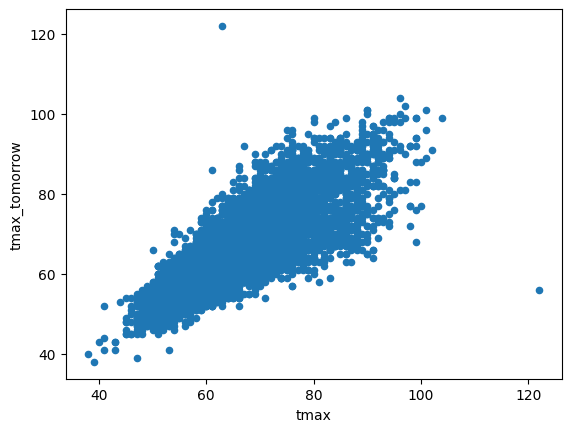

In [5]:
data = pd.read_csv("clean_weather.csv", index_col=0)
data = data.ffill()

data.plot.scatter("tmax", "tmax_tomorrow")

In [3]:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


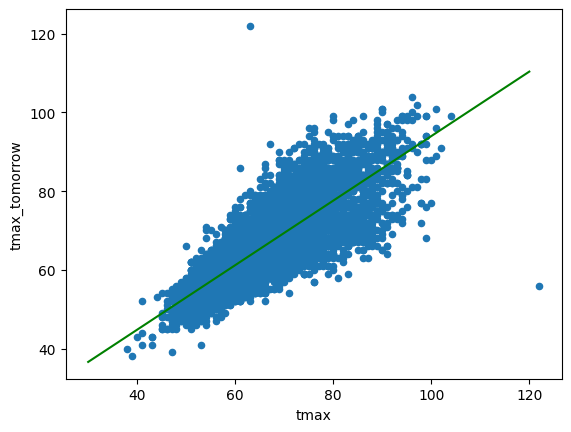

In [ ]:
data.plot.scatter("tmax", "tmax_tomorrow")

prediction = lambda x, wl=0.82, b=11.99: x * wl + b

plt.plot([30, 120], [prediction(30), prediction(120)], "green")

In [ ]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)


print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))

22.897335324598416


/var/folders/wt/slv2mgn9583ckxttpw12bkyc0000gn/T/ipykernel_15020/1083263908.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(tmax_bins).mean()
/var/folders/wt/slv2mgn9583ckxttpw12bkyc0000gn/T/ipykernel_15020/1083263908.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data['tmax'].groupby(tmax_bins).mean()


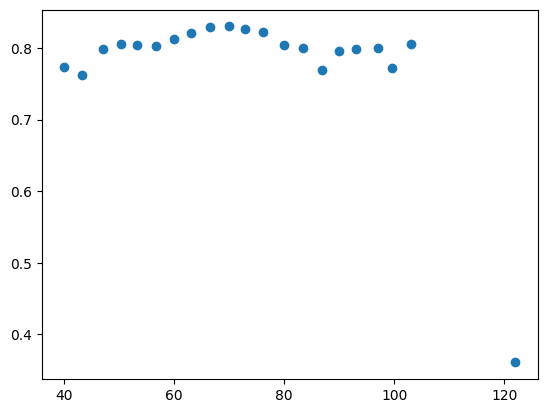

In [ ]:
tmax_bins = pd.cut(data["tmax"], 25)

ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()
binned_tmax = data["tmax"].groupby(tmax_bins).mean()

plt.scatter(binned_tmax, binned_ratio)
plt.show()

In [25]:
binned_ratio

tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812934
(61.52, 64.88]      0.821545
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830022
(71.6, 74.96]       0.825879
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771846
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

In [15]:
# A nonlinear transformation on top of the linear transformation (activation fucntion)
# Multiple layers which can capture interactions between feaures
# Multiple hidden units, which each have slightly different linear and non linear transformation

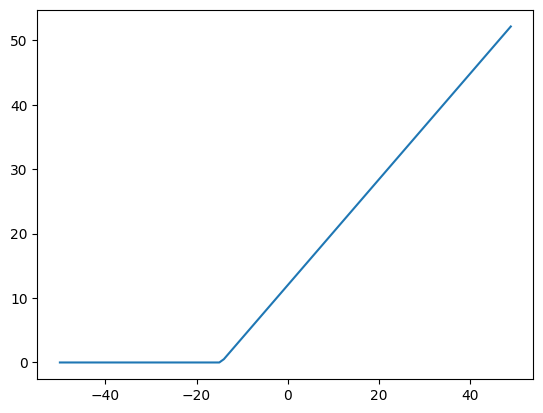

In [27]:
temps = np.arange(-50, 50)

plt.plot(temps, np.maximum(0, prediction(temps)))

$\hat{y} = w_{2} relu(w_{1} + b_{1}) + b_{2}$


(0.0, 40.0)

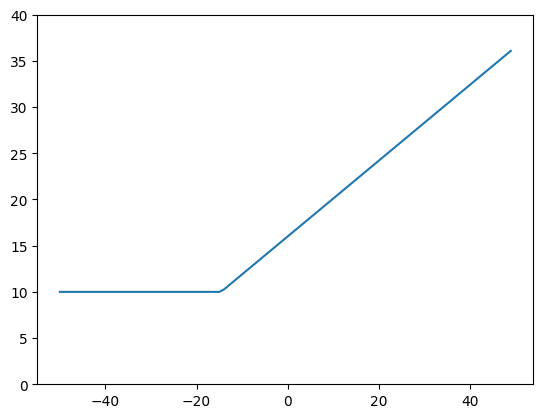

In [ ]:
temps = np.arange(-50, 50)
prediction = lambda x, w=0.82, b=11.99: w * x + b
layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, 0.5, 10)

plt.plot(temps, layer2)
plt.ylim(0, 40)

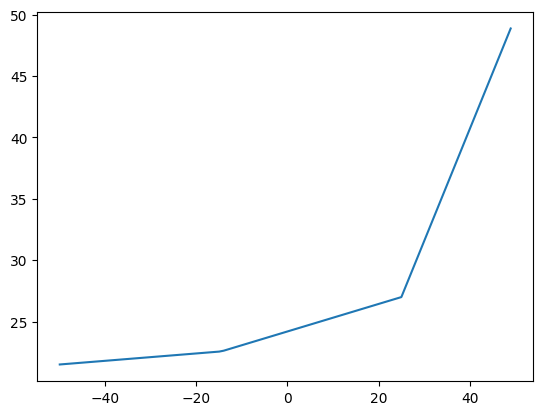

In [ ]:
temps = np.arange(-50, 50)
prediction = lambda x, w=0.82, b=11.92: w * x + b
layer1_1 = np.maximum(0, prediction(temps))
layer1_2 = np.maximum(0, prediction(temps, 0.1, 10))
layer1_3 = np.maximum(0, prediction(temps, 2, -50))

layer2 = layer1_1 * 0.1 + layer1_2 * 0.3 + layer1_3 * 0.4 + 20


# plt.plot(temps, layer1_1)
# plt.plot(temps, layer1_2)
plt.plot(temps, layer2)

In [ ]:
inp = np.array([[80], [90], [100], [-20], [-10]])

l1_weights = np.array([[0.82, 0.1]])

l1_bias = np.array([[11.99, 10]])

l1_output = inp @ l1_weights + l1_bias
print(l1_output)

[[77.59 18.  ]
 [85.79 19.  ]
 [93.99 20.  ]
 [-4.41  8.  ]
 [ 3.79  9.  ]]


In [ ]:
# applying relu
l1_activated = np.maximum(l1_output, 0)
print(l1_activated)

[[77.59 18.  ]
 [85.79 19.  ]
 [93.99 20.  ]
 [ 0.    8.  ]
 [ 3.79  9.  ]]


In [ ]:
# layer 2
l2_weights = np.array([[0.5], [0.2]])

l2_bias = np.array([[5]])

output = l1_activated @ l2_weights + l2_bias
print(output)

[[47.395]
 [51.695]
 [55.995]
 [ 6.6  ]
 [ 8.695]]


In [3]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [4]:
def mse_grad(actual, predicted):
    return predicted - actual

In [75]:
# partial derivative of loss wrt to the output of layer 2
output_gradient = mse_grad(tmax_tomorrow, output)

In [76]:
l2_w_gradient = l1_activated.T @ output_gradient

In [77]:
l2_b_gradient = np.mean(output_gradient, axis=0)

In [78]:
lr = 1e-5
l2_bias = l2_bias - l2_b_gradient * lr
l2_weights = l2_weights - l2_w_gradient * lr

In [81]:
l1_activated_gradient = output_gradient @ l2_weights.T
l1_activated_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [ 17.03473309,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [82]:
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
l1_output_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [  0.        ,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [84]:
l1_w_gradient = inp.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [85]:
l1_bias

array([[11.99022448, 10.00005707]])

1. Run the network forward pass, and get the output
2. Compute gradient with respect to the outputs of the network (the mse_grad function)
3. for each layer in the network:
   - Compute the gradient with respect to the pre-nonlinearity output (if the layers has a nonlinearity)
   - Compute the gradient with respect to the weights
   - Compute the gradient with respect to the biases
   - Compute the gradient with respect to the inputs to the layer
4. Update the parametes in the network using gradient descent.


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [
    [d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data
]

/Users/chiragbangera/Developer/Handsonml/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append(
            [
                np.random.rand(inputs[i - 1], inputs[i]) / 5 - 0.1,
                np.ones((1, inputs[i])),
            ]
        )
    return layers


# This will initialize weights and biases for a 3-layer neural network with 10 units in the first layer, 10 in the second, and 1 in the final
# The first number (3) is our number of input features
layer_conf = [3, 10, 10, 1]

In [10]:
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        # Store the forward pass hidden values for use in backprop
        hidden.append(batch.copy())
    return batch, hidden

In [13]:
def mse(actual, predicted):
    return actual - predicted


def mse_grad(actual, predicted):
    return predicted - actual

In [11]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers) - 1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i + 1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        grad = grad @ layers[i][0].T
    return layers

In [14]:
lr = 1e-6
epochs = 10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i : (i + batch_size)]
        y_batch = train_y[i : (i + batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss**2))

        layers = backward(layers, hidden, loss, lr)

    valid_preds, _ = forward(valid_x, layers)

    print(
        f"Epoch: {epoch} Train MSE: {np.mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}"
    )

Epoch: 0 Train MSE: 3347.1506588441052 Valid MSE: -41.72778396304392
Epoch: 1 Train MSE: 371.0160486434127 Valid MSE: -2.06336193197091
Epoch: 2 Train MSE: 25.327269567479423 Valid MSE: -0.4643081684014836
Epoch: 3 Train MSE: 22.98534302456075 Valid MSE: -0.36813715105503286
Epoch: 4 Train MSE: 22.315485404685358 Valid MSE: -0.3362910587448848
Epoch: 5 Train MSE: 22.14226994366112 Valid MSE: -0.3228520645577553
Epoch: 6 Train MSE: 22.096505942446136 Valid MSE: -0.3167984927041476
Epoch: 7 Train MSE: 22.08326694144976 Valid MSE: -0.31401490911527286
Epoch: 8 Train MSE: 22.078606695649075 Valid MSE: -0.3127201099192363
Epoch: 9 Train MSE: 22.07601081836369 Valid MSE: -0.3121383972529018


In [4]:
print(len(init_layers(layer_conf)))

3
